In [1]:
import numpy as np, pandas as pd
import glob

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from scipy.stats import chi2_contingency

import mypackages as mp

# File Load

In [2]:
#file load
df_main = mp.fileListLoad('Data/all/*.sas7bdat')
df_sup = mp.fileListLoad('Data/sup/*.sas7bdat')

In [3]:
df_2019 = df_main[0].copy()
df_2020 = df_main[1].copy()
df_2021 = df_main[2].copy()

df_2019_sup = df_sup[0].copy()
df_2020_sup = df_sup[1].copy()
df_2021_sup = df_sup[2].copy()

In [4]:
#merge files
df_2019_fsup = mp.toOneRow(df_2019_sup, mp.sumlist, mp.droplist)

df_2019f = pd.merge(df_2019, df_2019_fsup, how = 'left')

df_2019f.drop(columns = 'mod_d', inplace = True)
df_2019f['LS_SUP'].fillna(0.0, inplace = True)


df_2020_fsup = mp.toOneRow(df_2020_sup, mp.sumlist, mp.droplist)

df_2020f = pd.merge(df_2020, df_2020_fsup, how = 'left')

df_2020f.drop(columns = 'mod_d', inplace = True)
df_2020f['LS_SUP'].fillna(0.0, inplace = True)


df_2021_fsup = mp.toOneRow(df_2021_sup, mp.sumlist, mp.droplist)

df_2021f = pd.merge(df_2021, df_2021_fsup, how = 'left')

df_2021f.drop(columns = 'mod_d', inplace = True)
df_2021f['LS_SUP'].fillna(0.0, inplace = True)

C:\Users\Na\AppData\Local\Temp\ipykernel_26936\3209443826.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2019f['LS_SUP'].fillna(0.0, inplace = True)
C:\Users\Na\AppData\Local\Temp\ipykernel_26936\3209443826.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [5]:
df = pd.concat([df_2019f, df_2020f, df_2021f])

# Preprocess

In [6]:
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

C:\Users\Na\AppData\Local\Temp\ipykernel_26936\2359709196.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


In [7]:
df

,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,age_month,...,T_VHIT_EX_L,T_VHIT_EX_L_1,T_VHIT_GA_R,T_VHIT_GA_L,T_VHIT_COR_R,T_VHIT_COR_L,T_SOds,E_RT,E_CT,E_CLC_T
0,b'A751215301',b'A7512153',2019.0,1.0,1.0,1.0,b'A751',1.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'A751215303',b'A7512153',2019.0,1.0,1.0,1.0,b'A751',1.0,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'A751220401',b'A7512204',2019.0,1.0,1.0,1.0,b'A751',1.0,53.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b'A751220402',b'A7512204',2019.0,1.0,1.0,1.0,b'A751',2.0,50.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'A751220403',b'A7512204',2019.0,1.0,1.0,1.0,b'A751',1.0,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22554,b'R904351302',b'R9043513',2021.0,8.0,2.0,2.0,b'R904',1.0,25.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,b'888'
22555,b'R904353001',b'R9043530',2021.0,8.0,2.0,2.0,b'R904',1.0,45.0,NaN,...,1.0,NaN,1.33,1.12,0.0,0.0,0.0,1.0,4.0,b'888'
22556,b'R904353002',b'R9043530',2021.0,8.0,2.0,2.0,b'R904',2.0,43.0,NaN,...,1.0,NaN,1.03,1.03,0.0,0.0,0.0,1.0,3.0,b'888'
22557,b'R904353003',b'R9043530',2021.0,8.0,2.0,2.0,b'R904',1.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop(columns=['ID', 'psu'], inplace=True)

In [9]:
df['age_month'].fillna(df['age']*12 + 6, inplace=True)
df.drop(columns='age', inplace = True)

C:\Users\Na\AppData\Local\Temp\ipykernel_26936\54553673.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_month'].fillna(df['age']*12 + 6, inplace=True)


In [10]:
df.drop(columns=['incm', 'ho_incm'], inplace=True)

In [11]:
df

,ID_fam,year,region,town_t,apt_t,sex,age_month,incm5,ho_incm5,edu,...,T_VHIT_EX_L,T_VHIT_EX_L_1,T_VHIT_GA_R,T_VHIT_GA_L,T_VHIT_COR_R,T_VHIT_COR_L,T_SOds,E_RT,E_CT,E_CLC_T
0,b'A7512153',2019.0,1.0,1.0,1.0,1.0,738.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'A7512153',2019.0,1.0,1.0,1.0,1.0,342.0,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'A7512204',2019.0,1.0,1.0,1.0,1.0,642.0,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b'A7512204',2019.0,1.0,1.0,1.0,2.0,606.0,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'A7512204',2019.0,1.0,1.0,1.0,1.0,198.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22554,b'R9043513',2021.0,8.0,2.0,2.0,1.0,306.0,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,b'888'
22555,b'R9043530',2021.0,8.0,2.0,2.0,1.0,546.0,3.0,4.0,4.0,...,1.0,NaN,1.33,1.12,0.0,0.0,0.0,1.0,4.0,b'888'
22556,b'R9043530',2021.0,8.0,2.0,2.0,2.0,522.0,3.0,4.0,4.0,...,1.0,NaN,1.03,1.03,0.0,0.0,0.0,1.0,3.0,b'888'
22557,b'R9043530',2021.0,8.0,2.0,2.0,1.0,102.0,4.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dumlist = ['region', 'apt_t', 'incm5', 'ho_incm5', 'edu', 'occp']
'town_t', 'sex'

('town_t', 'sex')

In [13]:
df

,ID_fam,year,region,town_t,apt_t,sex,age_month,incm5,ho_incm5,edu,...,T_VHIT_EX_L,T_VHIT_EX_L_1,T_VHIT_GA_R,T_VHIT_GA_L,T_VHIT_COR_R,T_VHIT_COR_L,T_SOds,E_RT,E_CT,E_CLC_T
0,b'A7512153',2019.0,1.0,1.0,1.0,1.0,738.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'A7512153',2019.0,1.0,1.0,1.0,1.0,342.0,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'A7512204',2019.0,1.0,1.0,1.0,1.0,642.0,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b'A7512204',2019.0,1.0,1.0,1.0,2.0,606.0,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'A7512204',2019.0,1.0,1.0,1.0,1.0,198.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22554,b'R9043513',2021.0,8.0,2.0,2.0,1.0,306.0,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,b'888'
22555,b'R9043530',2021.0,8.0,2.0,2.0,1.0,546.0,3.0,4.0,4.0,...,1.0,NaN,1.33,1.12,0.0,0.0,0.0,1.0,4.0,b'888'
22556,b'R9043530',2021.0,8.0,2.0,2.0,2.0,522.0,3.0,4.0,4.0,...,1.0,NaN,1.03,1.03,0.0,0.0,0.0,1.0,3.0,b'888'
22557,b'R9043530',2021.0,8.0,2.0,2.0,1.0,102.0,4.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 영양제 복용 여부 vs. 건강상태

## 부모의 소득 및 교육 수준 -> 청소년기 영양 섭취 및 성인병, 영양 보충제 등에 미치는 영향

우선, 주의해야 할 것은 '부모의 소득'과 '부모의 교육 수준'은 상당한 상관관계를 보일 수 있는 변수라는 것이다. Cramer's V를 활용하여 이를 분석하면 다음과 같다.

0.0955086977620433


Text(0.5, 1.0, "Contingency Table Heatmap\nCramer's V: 0.10")

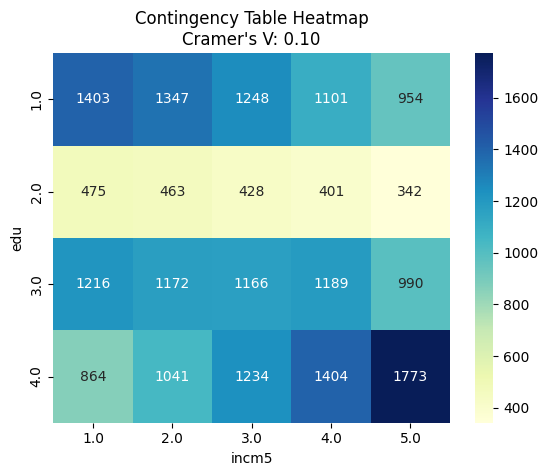

In [14]:
contingency_table = pd.crosstab(df['edu'], df['incm5'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(cramers_v)

sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Contingency Table Heatmap\nCramer\'s V: {cramers_v:.2f}')

0.09는 상관관계가 어느 정도 존재한다고 보이는 수치인데, 문제는 

<Axes: xlabel='edu', ylabel='incm5'>

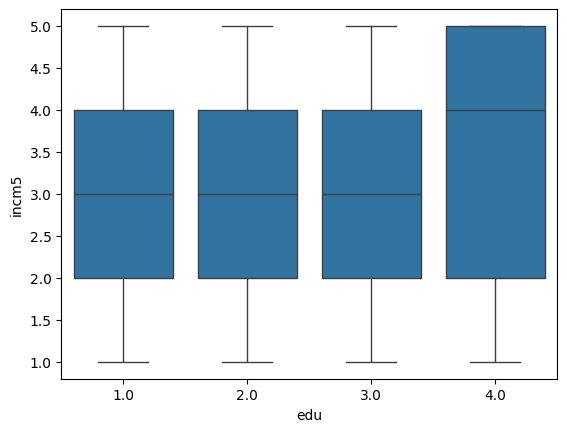

In [15]:
sns.boxplot(df, x = 'edu', y = 'incm5')

우선, 식이보충제 섭취 데이터를 활용하여 건강 지표를 예측하는 모델을 구축하고자 한다. 우선, 식이보충제 섭취와 '주관적 건강인지' 사이의 관계를 보고자 한다. 이는 '건강이 나쁘다고 생각해 식이보충제를 섭취'할 수도 있고, '식이보충제 섭취로 인해 건강이 좋아진다 생각'할 수도 있기 때문이다.

청소년의 식이보충제 섭취 데이터를 활용하여 건강 지표(BMI, 혈압, 혈액검사 결과 등)를 예측하는 머신 러닝 모델을 구축한다. 

해당 연구의 목적은 다음과 같다.

식이보충제 섭취 여부, 해당 식이보충제의 특성, 주관적 건강인지, 소득 수준 등 '검진을 하지 않아도 알 수 있는 정보'를 활용하여 '검진을 해야 할 수 있는 건강 상태'를 예측한다. 특히, 건강 상태와 관련하여 이를 추적함으로써 유병 여부에 대한 연구가 가능할 것이다.

# 목적

우선, 해당 연구에서 예측하고자 하는 질병을 선택한다. 해당 자료에서는 '질병'으로 고혈압, 이상지질혈증, 뇌졸중, 심근경색증, 협심증, 골관절염, 류마티스성 관절염, 골다공증, 폐결핵, 천식, 갑상선 질환, 당뇨병, 각종 암(위암, 간암, 대장암, 유방암, 자궁경부암, 폐암, 갑상선암), 우울증, 아토피피부염, 알레르기비염, 부비동염, 중이염, 백내장, 녹내장, 황반변성, 당뇨망막병증, 신장질환, 간염, 간경병증, 통풍, 수면무호흡증, 소아청소년질환(ADHD, 폐렴) 등 다양한 질병 여부를 담고 있다. 이 중 '소아청소년질환'은 성인에게서 관측하기 어려우므로 제외하고, 반대로 다른 질병들은 '소아/청소년'에서 관측되지 않아 이를 연구하는 경우 소아/청소년 칼럼은 모두 드랍한다. 주로 고연령층에서 나타나고 저연령층에서 큰 관심이 없는 병 역시 제외한다. 이에 따라, 해당 연구에서는 '고혈압, 당뇨병, 이상지질혈증'과 같이 저연령층(20대)에서도 진단 빈도가 늘어난다고 알려져 있는 병을 주로 탐구할 것이다. 

# 전처리 및 변수 선택

고혈압 및 이상지질혈증의 경우, 다음과 같다.

In [16]:
df[['DI1_dg', 'DI1_pr', 'DI1_pt', 'DI2_dg', 'DI2_pr', 'DI2_pt']]

,DI1_dg,DI1_pr,DI1_pt,DI2_dg,DI2_pr,DI2_pt
0,1.0,1.0,1.0,0.0,8.0,8.0
1,0.0,8.0,8.0,0.0,8.0,8.0
2,0.0,8.0,8.0,0.0,8.0,8.0
3,0.0,8.0,8.0,0.0,8.0,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22554,0.0,8.0,8.0,0.0,8.0,8.0
22555,0.0,8.0,8.0,1.0,1.0,0.0
22556,0.0,8.0,8.0,0.0,8.0,8.0
22557,8.0,8.0,8.0,8.0,8.0,8.0


왼쪽부터 고혈압 의사진단 여부, 현재 유병 여부, 치료 여부, 이상지질혈증 진단/유병/치료 여부를 나타낸다. 8은 비해당, 9는 무응답이다. 해당 연구에서는 '고혈압/이상지질혈증 의사 진단 여부'를 라벨로 사용할 것이다. (`DI1_dg`, `DI2_dg`)

당뇨병의 경우, DE1으로 시작하는 모든 컬럼이 관련 설문 결과를 나타낸다. 해당 문제에서는 앞서의 문항과의 일관성을 위해 `DE1_dg`을 활용한다.

공통적으로, 라벨에서는 '현재 유병 여부'를 활용하기로 하였다. 이는 관심을 가지는 것이 각종 생활 습관을 통해 해당 질병 여부를 예측하는 것이기 때문이다. 해당 질환들은 모두 만성 질환이므로 '완치'를 가정하기 어렵고, 해당 질환이 '의사에게 진단되었는가?' 여부를 이와 관련되지 않은 정보를 활용해 예측하는 것이 주요 관심사이기 때문이다. 이에 따라 데이터프레임의 전처리를 진행한다. 이외의 질병 정보는 모두 드랍할 것이다.

In [17]:
df['DI1_dg'] = df['DI1_dg'].replace([8.0, 9.0], np.NaN)
df['DI2_dg'] = df['DI2_dg'].replace([8.0, 9.0], np.NaN)
df['DE1_dg'] = df['DE1_dg'].replace([8.0, 9.0], np.NaN)
df.dropna(subset=['DI1_dg', 'DI2_dg', 'DE1_dg'], inplace = True)

In [18]:
labelcols = ['DI1_dg', 'DI2_dg', 'DE1_dg']

In [19]:
df.reset_index(inplace=True)
df.drop(columns = ['index'], inplace = True)

C:\Users\Na\AppData\Local\Temp\ipykernel_26936\4288306074.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


이후, NA가 9로 지정되어 있는 컬럼을 적절히 폐기하였다.

In [20]:
df['genertn'] = df['genertn'].replace(9, np.NaN) #가구 구성
df['house'] = df['house'].replace(9, np.NaN)
df['live_t'] = df['live_t'].replace(9, np.NaN)
df['allownc'] = df['allownc'].replace(99, 10) #기초생활수급 여부
df['marri_1'] = df['marri_1'].replace(9, np.NaN)
df['D_1_1'] = df['D_1_1'].replace(9, np.NaN)
df['BD1_11'] = df['BD1_11'].replace([88, 99], np.NaN) #주당 주량(범주형)
df['BP16_1'] = df['BP16_1'].replace([88, 99], np.NaN) #주중 수면시간
df['BP16_2'] = df['BP16_2'].replace([88, 99], np.NaN) #주말 수면시간
df['BS3_1'] = df['BS3_1'].replace([8, 9], np.NaN) #현재 담배 사용 여부
df['EC_occp'] = df['EC_occp'].replace({88:0, 99:np.NaN})

occp는 88(무직 등)을 0으로 보내고, 99를 제외하는 것으로 처리하였다.

In [21]:
using_cols = ['DI1_dg', 'DI2_dg', 'DE1_dg', 'live_t', 'allownc', 'genertn', 'house', 'town_t', 
              'apt_t', 'sex', 'marri_1', 'D_1_1', 'BD1_11', 'BS3_1', 'EC_occp', 
              'BP16_1', 'BP16_2', 'age_month']


In [22]:
df = df[using_cols].copy()
df

,DI1_dg,DI2_dg,DE1_dg,live_t,allownc,genertn,house,town_t,apt_t,sex,marri_1,D_1_1,BD1_11,BS3_1,EC_occp,BP16_1,BP16_2,age_month
0,1.0,0.0,0.0,3.0,20.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,3.0,0.0,4.0,4.0,738.0
1,0.0,0.0,0.0,3.0,20.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,0.0,9.0,12.0,342.0
2,0.0,0.0,0.0,3.0,20.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,0.0,8.0,8.0,642.0
3,0.0,0.0,0.0,3.0,20.0,4.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,7.0,8.0,606.0
4,1.0,0.0,0.0,3.0,20.0,1.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0,NaN,0.0,8.0,8.0,858.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17890,1.0,1.0,0.0,2.0,20.0,4.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,534.0
17891,0.0,0.0,0.0,2.0,20.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,3.0,0.0,NaN,NaN,654.0
17892,0.0,0.0,0.0,2.0,20.0,4.0,3.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,5.0,NaN,NaN,306.0
17893,0.0,1.0,0.0,2.0,20.0,4.0,2.0,2.0,2.0,1.0,1.0,3.0,5.0,3.0,3.0,NaN,NaN,546.0


한편, 1과 2로 라벨이 지정되어 있는 더미를 적절히 dummy processing한다. region의 경우, 해당 자료를 소득 및 '동/읍면' 칼럼으로 대체할 수 있으므로 폐기하였다.

In [23]:
columns_to_mone = ['town_t', 'apt_t', 'sex', 'house', 'marri_1', 'live_t']
for col in columns_to_mone:
    df[col] = df[col].apply(lambda x: x - 1)
df['allownc'] = df['allownc'].apply(lambda x: x/10 - 1)

In [24]:
dummycols = ['live_t', 'allownc', 'genertn', 'house', 'town_t', 'apt_t', 
             'sex', 'marri_1', 'D_1_1', 'BD1_11', 'BS3_1', 'EC_occp']
for col in dummycols:
    df[col] = df[col].astype('category')

In [25]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(columns = 'index', inplace =True)

In [26]:
df_dummy = pd.get_dummies(df[dummycols], drop_first = True)
df = pd.concat([df, df_dummy], axis = 1)

In [27]:
dcols = list(df_dummy.columns)
concols = ['BP16_1', 'BP16_2', 'age_month']
for col in dcols :
    df[col] = df[col].astype('int')

In [28]:
df.drop(columns=dummycols, inplace = True)

# 모델 구축

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

Train-Test 스플릿을 두 차례 시행하되, Test 스플릿은 모델의 최종 성능을 평가하기 위해서만 사용한다. Train 스플릿을 다시 수행하되, 하이퍼파라미터 튜닝은 Train에서만 수행하고 Test는 여러 fitted된 모델끼리 성능을 비교하여 최종 모델을 결정하기 위해서만 사용한다.

In [30]:
df_X = df.drop(columns=labelcols).copy()
df_y = df[labelcols].copy()

In [31]:
Xtr, X_test, ytr, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(Xtr, ytr, test_size=0.2, random_state=42)

0(정상)과 1(고혈압) 간 비중 차이가 크므로, SMOTE oversampling을 사용한다.

In [32]:
X_train

,BP16_1,BP16_2,age_month,live_t_1.0,live_t_2.0,live_t_3.0,allownc_1.0,genertn_2.0,genertn_3.0,genertn_4.0,...,EC_occp_1.0,EC_occp_2.0,EC_occp_3.0,EC_occp_4.0,EC_occp_5.0,EC_occp_6.0,EC_occp_7.0,EC_occp_8.0,EC_occp_9.0,EC_occp_10.0
719,7.0,8.0,330.0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1549,9.0,9.0,774.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3744,8.0,8.0,438.0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1315,7.0,6.0,546.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2181,6.0,10.0,522.0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,5.0,5.0,858.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2405,5.0,5.0,450.0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
370,7.0,7.0,438.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1529,5.0,5.0,966.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
smote = SMOTE(random_state=42)
X_trains, y_trains = smote.fit_resample(X_train, y_train['DI1_dg'])

In [34]:
X_train

,BP16_1,BP16_2,age_month,live_t_1.0,live_t_2.0,live_t_3.0,allownc_1.0,genertn_2.0,genertn_3.0,genertn_4.0,...,EC_occp_1.0,EC_occp_2.0,EC_occp_3.0,EC_occp_4.0,EC_occp_5.0,EC_occp_6.0,EC_occp_7.0,EC_occp_8.0,EC_occp_9.0,EC_occp_10.0
719,7.0,8.0,330.0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1549,9.0,9.0,774.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3744,8.0,8.0,438.0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1315,7.0,6.0,546.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2181,6.0,10.0,522.0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,5.0,5.0,858.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2405,5.0,5.0,450.0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
370,7.0,7.0,438.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1529,5.0,5.0,966.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_valid.reset_index(inplace=True)
y_valid.reset_index(inplace=True)
X_valid.drop(columns='index', inplace=True)
y_valid.drop(columns='index', inplace=True)
X_test.reset_index(inplace=True)
y_test.reset_index(inplace=True)
X_test.drop(columns='index', inplace=True)
y_test.drop(columns='index', inplace=True)

In [36]:
X_train

,BP16_1,BP16_2,age_month,live_t_1.0,live_t_2.0,live_t_3.0,allownc_1.0,genertn_2.0,genertn_3.0,genertn_4.0,...,EC_occp_1.0,EC_occp_2.0,EC_occp_3.0,EC_occp_4.0,EC_occp_5.0,EC_occp_6.0,EC_occp_7.0,EC_occp_8.0,EC_occp_9.0,EC_occp_10.0
719,7.0,8.0,330.0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1549,9.0,9.0,774.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3744,8.0,8.0,438.0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1315,7.0,6.0,546.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2181,6.0,10.0,522.0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,5.0,5.0,858.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2405,5.0,5.0,450.0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
370,7.0,7.0,438.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1529,5.0,5.0,966.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
scaler = MinMaxScaler()
X_train_dummies = X_train[dcols]
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[concols]), columns=concols)
X_train_final = pd.concat([X_train_scaled, X_train_dummies.reset_index(drop=True)], axis=1)

In [38]:
scalers = MinMaxScaler()
X_trains_dummies = X_trains[dcols]
X_trains_scaled = pd.DataFrame(scalers.fit_transform(X_trains[concols]), columns=concols)
X_trains_final = pd.concat([X_trains_scaled, X_trains_dummies.reset_index(drop=True)], axis=1)

minmaxscaler를 사용한 것은, 데이터 분포상 살펴본 것처럼 대부분 극단값이 없는 범주형 데이터이기 때문이다.

# Learning

In [39]:
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [40]:
LassoLogisticClassifier_blood = LogisticRegressionCV(
    cv=5, 
    penalty='l1', 
    solver='saga', 
    scoring='recall',
    random_state=42,
    max_iter=1000000
)
LassoLogisticClassifier_blood.fit(X_trains_final, y_trains)

LogisticRegressionCV(cv=5, max_iter=1000000, penalty='l1', random_state=42,
                     scoring='recall', solver='saga')

In [41]:
LassoLogisticClassifier_blood2 = LogisticRegressionCV(
    cv=5, 
    penalty='l1', 
    solver='saga', 
    scoring='recall',
    random_state=42,
    max_iter=1000000
)
LassoLogisticClassifier_blood2.fit(X_train_final, y_train['DI1_dg'])

LogisticRegressionCV(cv=5, max_iter=1000000, penalty='l1', random_state=42,
                     scoring='recall', solver='saga')

In [42]:
dummyX = X_valid[dcols].copy()
scaleX = X_valid[concols].copy()
scaleX = pd.DataFrame(scaler.transform(scaleX), columns = concols)
X_valid = pd.concat([scaleX, dummyX], axis = 1)

In [43]:
y_pred = LassoLogisticClassifier_blood2.predict(X_valid)
LassoLogisticClassifier_blood2.score(X_valid, y_valid['DI1_dg'])
print(classification_report(y_valid['DI1_dg'], y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       548
         1.0       0.53      0.34      0.41       178

    accuracy                           0.76       726
   macro avg       0.67      0.62      0.63       726
weighted avg       0.74      0.76      0.74       726



In [44]:
dummyX = X_valid[dcols].copy()
scaleX = X_valid[concols].copy()
scaleX = pd.DataFrame(scalers.transform(scaleX), columns = concols)
X_valid = pd.concat([scaleX, dummyX], axis = 1)

In [45]:
y_pred = LassoLogisticClassifier_blood.predict(X_valid)
LassoLogisticClassifier_blood.score(X_valid, y_valid['DI1_dg'])
print(classification_report(y_valid['DI1_dg'], y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       548
         1.0       0.25      1.00      0.39       178

    accuracy                           0.25       726
   macro avg       0.12      0.50      0.20       726
weighted avg       0.06      0.25      0.10       726



c:\Users\Na\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Na\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Na\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [46]:
xgbClassifier_param = {'n_estimators':[x for x in range(1, 10)], 'max_depth':[3*x for x in range(1, 11)]}

xgbClassifier = XGBClassifier()
xgbClassifier_grid = GridSearchCV(xgbClassifier, xgbClassifier_param, cv = 5, refit = True)

xgbClassifier_grid.fit(X_train, y_train['DE1_dg'])
xgbClassifier = xgbClassifier_grid.best_estimator_
print(xgbClassifier_grid.best_score_, xgbClassifier_grid.best_params_)

0.8841788830197638 {'max_depth': 6, 'n_estimators': 8}


In [47]:
y_pred = xgbClassifier.predict(X_valid)
print(classification_report(y_valid['DI1_dg'], y_pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86       548
         1.0       0.00      0.00      0.00       178

    accuracy                           0.75       726
   macro avg       0.38      0.50      0.43       726
weighted avg       0.57      0.75      0.65       726



c:\Users\Na\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Na\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Na\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f